# Day 59

### Link: https://www.kaggle.com/c/dogs-vs-cats/data?select=sampleSubmission.csv

Project link : https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/

## 1. Import the libraries:

In [62]:
import os 
import opendatasets as od
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


# ImageDataGenerator --> Used for the expand the size of the dataset.
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [63]:
od.download("https://www.kaggle.com/c/dogs-vs-cats/data?select=sampleSubmission.csv")

Skipping, found downloaded files in ".\dogs-vs-cats" (use force=True to force download)


In [64]:
os.listdir('.\dogs-vs-cats')

['sampleSubmission.csv', 'test1.zip', 'train', 'train.zip']

## 2. Define image properties

- To equalize the size of all the datapoints.

In [65]:
Image_Width = 128
Image_Height = 128
Image_Size = (Image_Width, Image_Height)
Image_Channels = 3 #RGB

In [66]:
import zipfile

# Define the path to the downloaded zip file
zip_path = './dogs-vs-cats/train.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the files in the zip archive to a target directory
    zip_ref.extractall('./dogs-vs-cats/')


## 3. Prepare dataset for training model:

In [67]:
filenames = os.listdir('./dogs-vs-cats/train/')

# train = ['cat.0.jpg', 'cat.1.jpg', .... , 'dog.98.jpg']

categories = [ ]

for i in filenames: # if i = cat.0.jpg
    category = i.split('.')[0]  # 'cat.0.jpg' --> ['cat', '0', 'jpg']
    # Category = 'cat
    if category == 'dog':
        categories.append(1)
    else: 
        categories.append(0)
        
# Dog = 1
# Cat = 0

df = pd.DataFrame({'filename': filenames,
                   "category": categories})

In [68]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


## 4. Create the neural net model

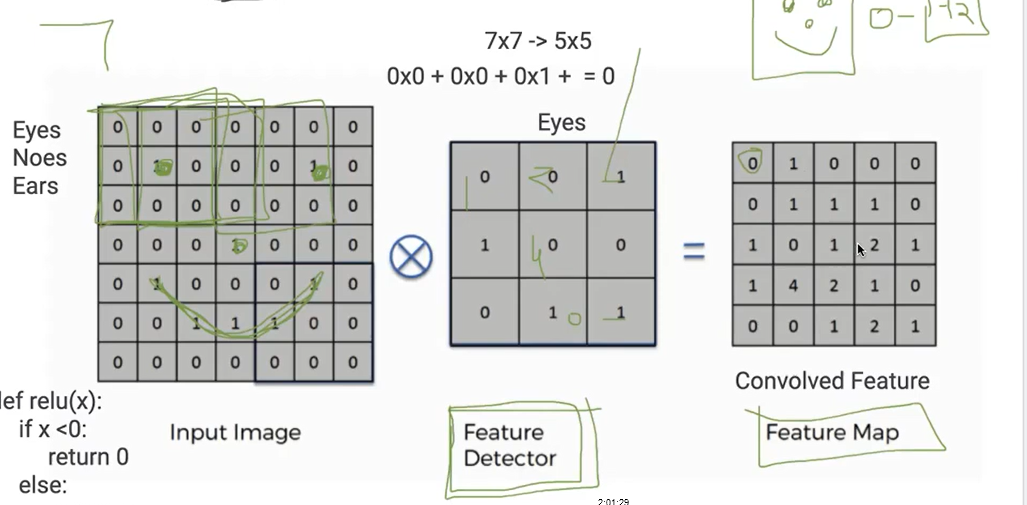

for (3,3 ) filter size

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D #Convolutional Network
MaxPool2D, # Pooling Layer
Dropout, # To Prevent Neural Network from overfitting
Flatten, # Flattening the Matrix Eg. 2D --> 1D
Dense, # Connected Neural Network
Activation, # Activation Function
BatchNormalization # Feature Scalling

model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu', input_shape = (Image_Width, Image_Height, Image_Channels)))
model.add(BatchNormalization ())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization ())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization ())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))



* Dropout

When created, the dropout rate can be specified to the layer as the probability of setting each input to the layer to zero. This is different from the definition of dropout rate from the papers, in which the rate refers to the probability of retaining an input.

Therefore, when a dropout rate of 0.8 is suggested in a paper (retain 80%), this will, in fact, will be a dropout rate of 0.2 (set 20% of inputs to zero).

Below is an example of creating a dropout layer with a 50% chance of setting inputs to zero.

Info: https://towardsdatascience.com/understanding-and-implementing-dropout-in-tensorflow-and-keras-a8a3a02c1bfa



Rate: the parameter 𝑝 which determines the odds(chances) of dropping out neurons. When you did not validate which 𝑝 works best for you with a validation set, recall that it’s best to set it to 𝑟𝑎𝑡𝑒≈0.5 for hidden layers and 𝑟𝑎𝑡𝑒≈0.1 for the input layer (note that 𝑟𝑎𝑡𝑒≈0.1 equals 𝑝≈0.9 – Keras turns the logic upside down, making rate the odds of dropping out rather than keeping neurons!)


In [70]:
model.add(Flatten ())

# 1st Hidden layer
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(.5))

# @nd Hidden Layer
model.add(Dense(2,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

* Activation Function

Link: https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

## 5. Analyzing model:

In [71]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_8 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 61, 61, 64)      

## 6. Define callbacks and learning rate:

Link: https://keras.io/api/callbacks/

In [72]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping (patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc', patience= 2, verbose=1, factor=.5, min_lr=.00001)
callback = [earlystop, learning_rate_reduction]

## 7. Manage data:

In [73]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
 
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

## 8. Training and validation data generator:

In [74]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./dogs-vs-cats/train/",
                                                 x_col='filename',
                                                 y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size )

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "./dogs-vs-cats/test/",
                                                 x_col='filename',
                                                 y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 0 validated image filenames belonging to 0 classes.


c:\Users\Shree\anaconda3\lib\site-packages\keras\preprocessing\image.py:1137: UserWarning: Found 20000 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


## 9. Model Training:

In [76]:
epochs=5
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks= callback
)

C:\Users\Shree\AppData\Local\Temp\ipykernel_14396\1867408727.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/5
1333/1333 [==============================] - 1085s 814ms/step - loss: 0.5641 - accuracy: 0.7145 - val_loss: 0.5565 - val_accuracy: 0.7562 - lr: 0.0010
Epoch 2/5
1333/1333 [==============================] - 855s 641ms/step - loss: 0.4932 - accuracy: 0.7636 - val_loss: 0.6126 - val_accuracy: 0.7700 - lr: 0.0010
Epoch 3/5
1333/1333 [==============================] - 800s 600ms/step - loss: 0.4618 - accuracy: 0.7862 - val_loss: 0.3613 - val_accuracy: 0.8414 - lr: 0.0010
Epoch 4/5
1333/1333 [==============================] - 809s 607ms/step - loss: 0.4362 - accuracy: 0.8019 - val_loss: 0.4486 - val_accuracy: 0.7842 - lr: 0.0010
Epoch 5/5
1333/1333 [==============================] - 793s 595ms/step - loss: 0.4193 - accuracy: 0.8106 - val_loss: 0.4964 - val_accuracy: 0.7487 - lr: 0.0010


## 10. Save the model:

In [77]:
model.save("model1_catsVSdogs_10epoch.h5")

## 11. Visualize the prediction results:

In [78]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./dogs-vs-cats/test1/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

NameError: name 'test_df' is not defined